# Introduction

The purpose of this study is to learn the relationship between 

"CO2 partial pressure of the global ocean surface" 

and

"Sea surface tempreture, atmospheric pressure and CO2 concentration"

Therefore, the predictors used in this study are:

1.global sea surface tempreture (SST), as in figure

2.global sea surface atmospheric pressure (SP), as in figure

3.global average CO2 concentration, as in numeric

the predictent used in this study is:

global CO2 partial pressure of sea surface, as in figure

The time span of this study is from 1982-01-01 to 2019-12-01

# Data source and accessibility

The data used in this study are:

1.SST and SP:

the ECMWF ERA5

Data are directly dowloaded from the CDS cloud server:

https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=form

2.CO2 partial pressure:

Introduction and data access are provided by National Centre for Environmental Information (NCEI), NOAA. 

https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.nodc%3A0160558/html

Landschützer, Peter; Gruber, Nicolas; Bakker, Dorothee C. E. (2017). An observation-based global monthly gridded sea surface pCO2 product from 1982 onward and its monthly climatology (NCEI Accession 0160558). 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential

from utils import * 

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

plt.rcParams['savefig.dpi'] = 400
plt.rcParams['font.size'] = 13
plt.rcParams["legend.frameon"] = False

## Some visualization of the data

In [2]:
#First the CO2 partial pressure data
fco2 = xr.open_dataset('spco2_MPI-SOM_FFN_v2020.nc', drop_variables = ['date'])
fco2

<xarray.Dataset>
Dimensions:         (time: 456, lat: 180, lon: 360, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 1982-01-15 1982-02-15 ... 2019-12-15
  * lat             (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon             (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: bnds
Data variables:
    dco2            (time, lat, lon) float32 ...
    atm_co2         (time, lat, lon) float32 ...
    sol             (time, lat, lon) float32 ...
    seaice          (time, lat, lon) float32 ...
    kw              (time, lat, lon) float32 ...
    spco2_raw       (time, lat, lon) float32 ...
    spco2_smoothed  (time, lat, lon) float32 ...
    fgco2_raw       (time, lat, lon) float32 ...
    fgco2_smoothed  (time, lat, lon) float32 ...
    time_bnds       (time, bnds) datetime64[ns] ...
    lat_bnds        (lat, bnds) float32 ...
    lon_bnds        (lon, bnds) float32 ...
Attributes:
    institution:    Max Planck Institute for Meteorology, Hamburg, Germany
    institude_id:   MPI-M
    model_id:       SOM-FFN
    run_id:         SOM_FFN_v2020
    contact:        Peter Landschutzer (peter.landschuetzer@mpimet.mpg.de)
    creation_date:  2020-04-23

In [3]:
signs = np.arange(456)
for t in signs:
    fco2.spco2_raw[t] = fco2.spco2_raw[t].fillna(0)

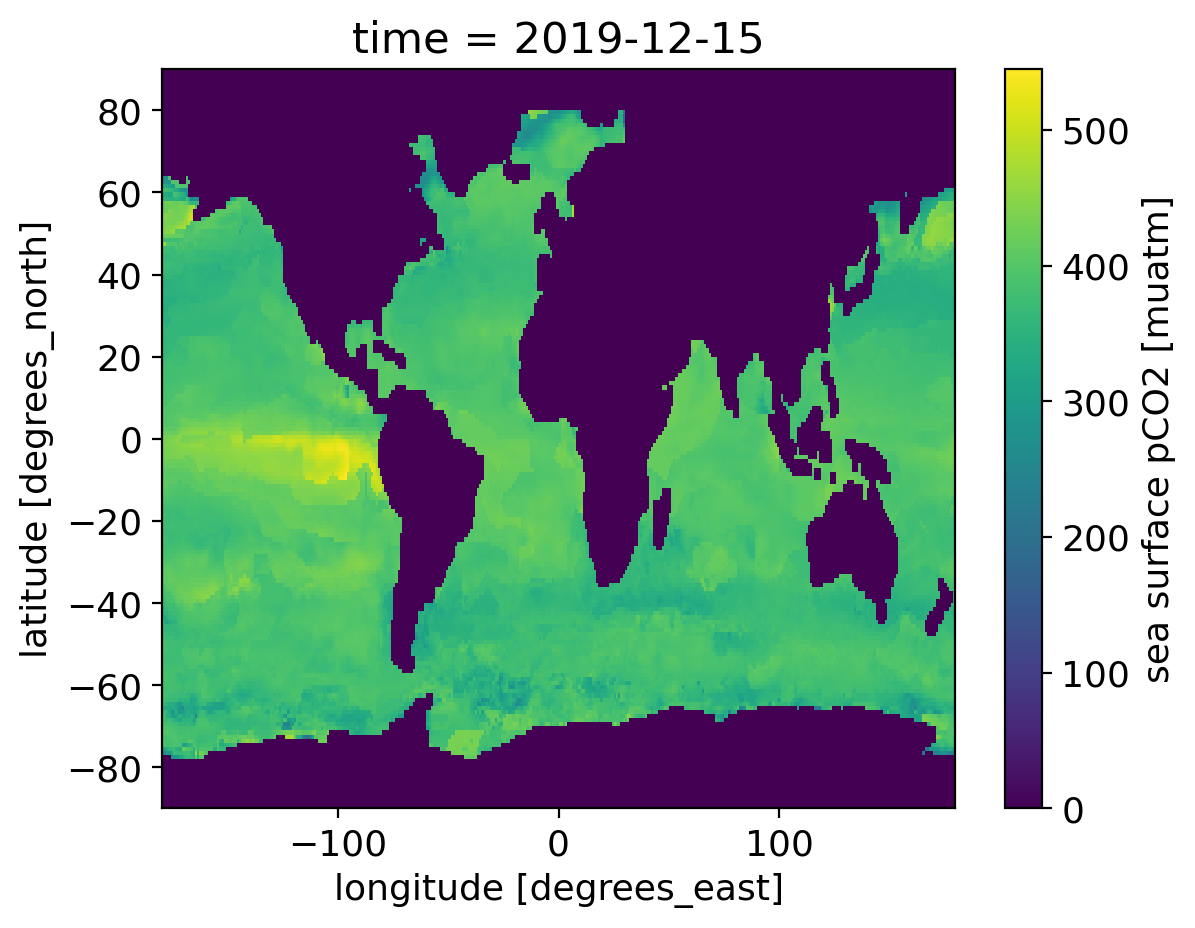

In [4]:
fco2.spco2_raw[455].plot()

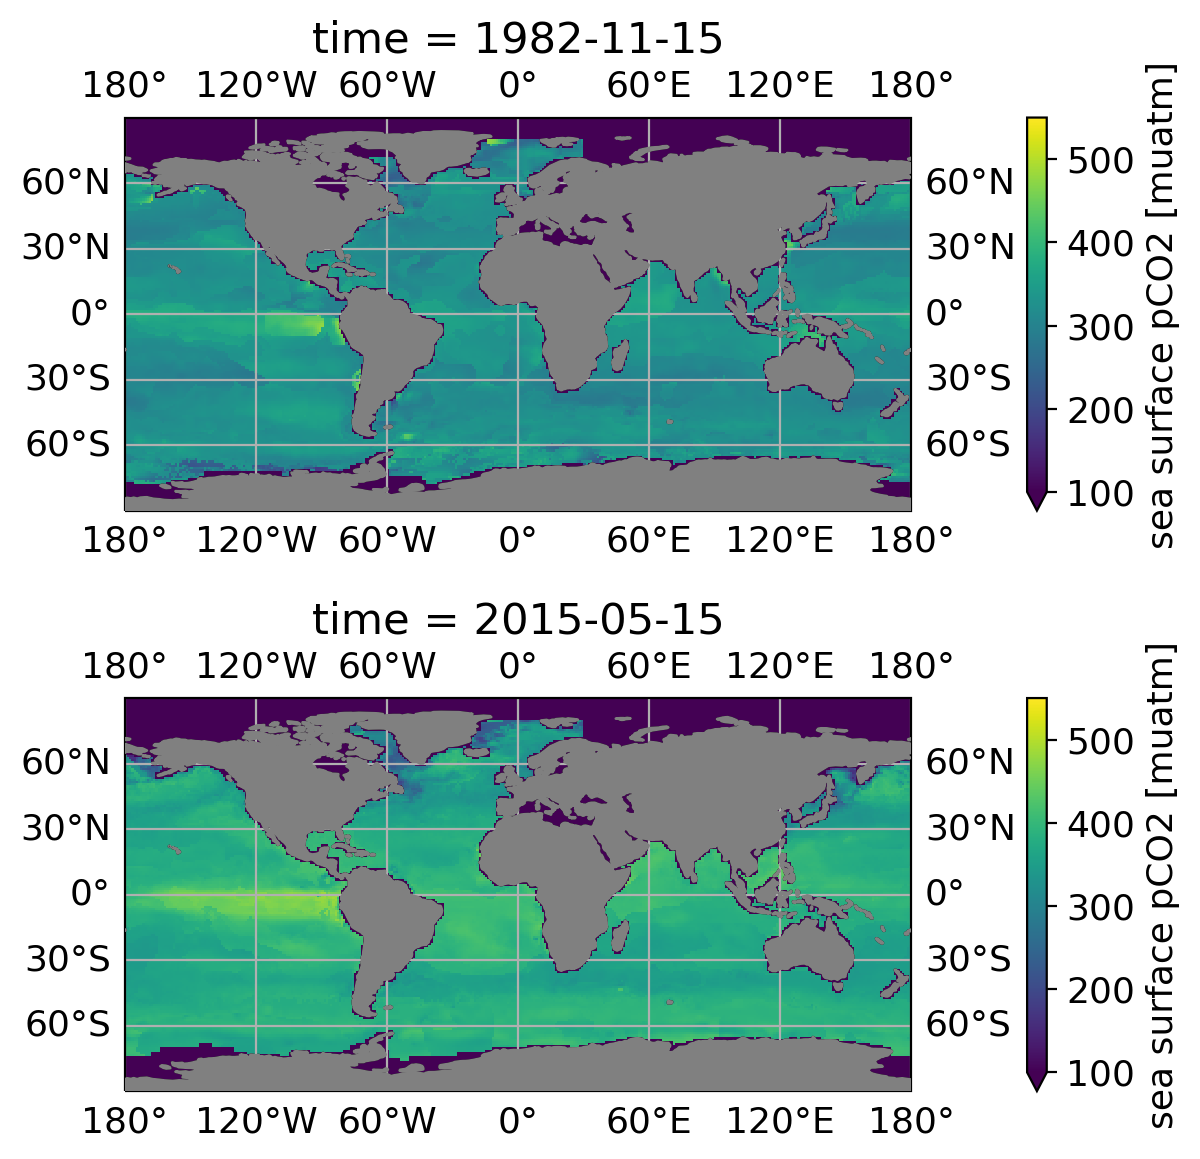

In [5]:
#Visualizaiton of the data
fig, ax = plt.subplots(nrows = 2, figsize = [12,6], sharex = True,
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)}
                      )
ax1,ax2 = ax

ax1.coastlines()
ax1.gridlines(draw_labels = True)
fco2.spco2_raw[10].plot(ax = ax1, vmin=100,vmax=550,
                                    transform=ccrs.PlateCarree(central_longitude=0)
                                   )
ax1.add_feature(cfeature.LAND, 
                zorder = 10, 
                color = 'gray')

ax2.coastlines()
ax2.gridlines(draw_labels = True)
fco2.spco2_raw[400].plot(ax = ax2, vmin=100,vmax=550,
                                    transform=ccrs.PlateCarree(central_longitude=0)
                                   )
ax2.add_feature(cfeature.LAND, 
                zorder = 10, 
                color = 'gray')
plt.tight_layout()

In [6]:
#Now the data for SST and SP
envi = xr.open_dataset('download.nc')
envi

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 456)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
Data variables:
    sst        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-11-28 18:40:03 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [7]:
for t in signs:
    envi.sst[t] = envi.sst[t].fillna(0)

envi.sst[455].plot()

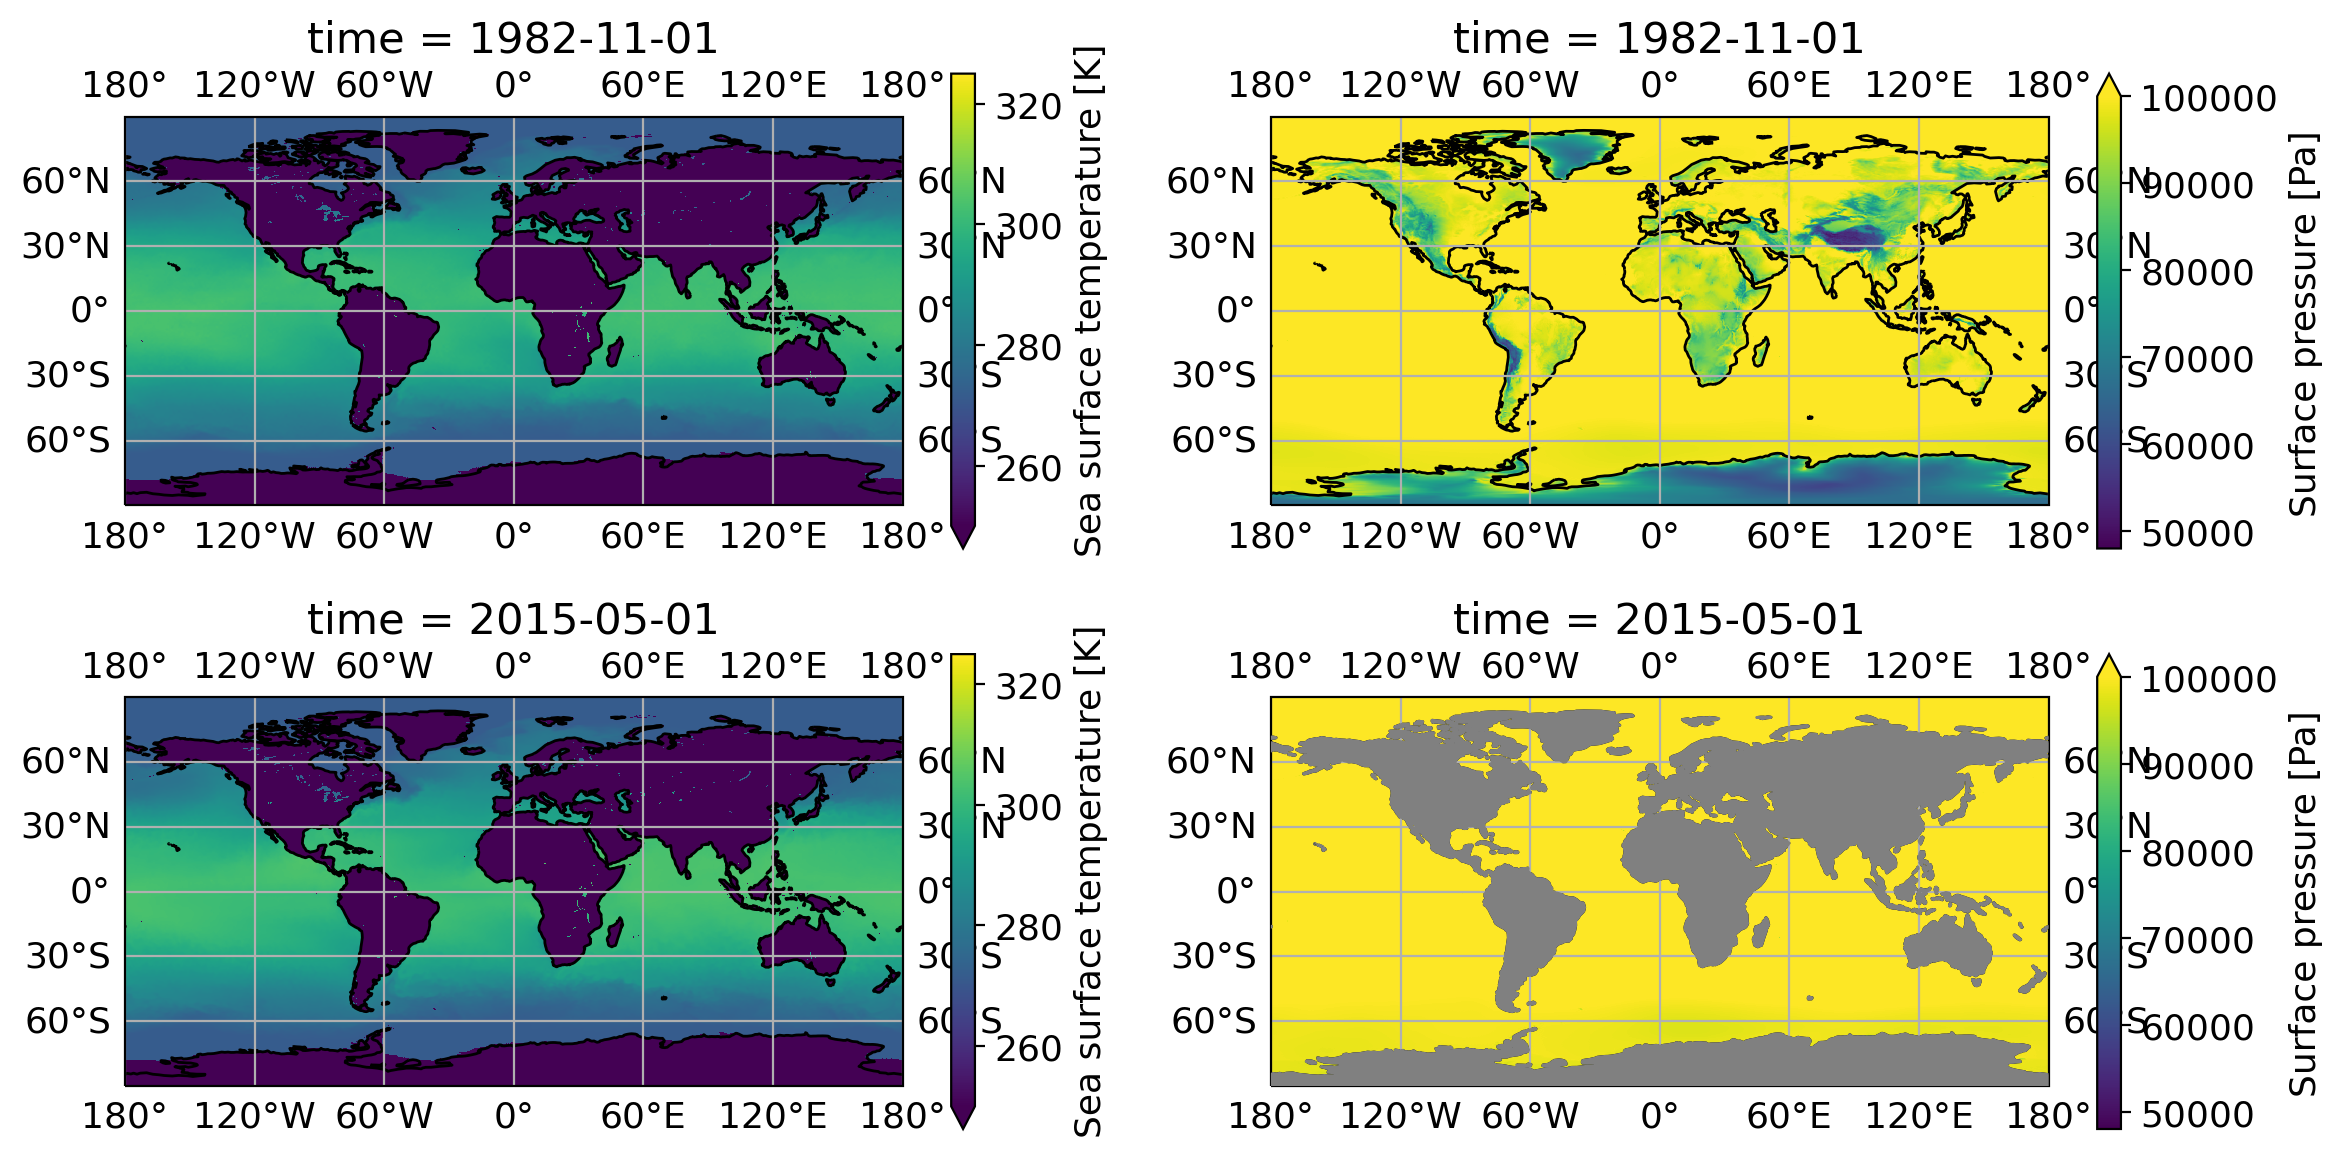

In [8]:
#Visualizaiton of the data
fig, ax = plt.subplots(nrows = 2, figsize = [12,6], ncols = 2,
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)}
                      )

#The SST
ax[0,0].coastlines()
ax[0,0].gridlines(draw_labels = True)
envi.sst[10].plot(ax = ax[0,0], vmin=250,vmax=325,
                                    transform=ccrs.PlateCarree(central_longitude=0)
                                   )
#ax[0,0].add_feature(cfeature.LAND, zorder = 10, color = 'gray')

ax[1,0].coastlines()
ax[1,0].gridlines(draw_labels = True)
envi.sst[400].plot(ax = ax[1,0], vmin=250,vmax=325,
                                    transform=ccrs.PlateCarree(central_longitude=0)
                                   )
#ax[1,0].add_feature(cfeature.LAND, zorder = 10, color = 'gray')

#The SP

ax[0,1].coastlines()
ax[0,1].gridlines(draw_labels = True)
envi.sp[10].plot(ax = ax[0,1], vmin=48000,vmax=100000,
                                    transform=ccrs.PlateCarree(central_longitude=0)
                                   )
#ax[0,1].add_feature(cfeature.LAND, zorder = 10, color = 'gray')

ax[1,1].coastlines()
ax[1,1].gridlines(draw_labels = True)
envi.sp[400].plot(ax = ax[1,1], vmin=48000,vmax=100000,
                                    transform=ccrs.PlateCarree(central_longitude=0)
                                   )
ax[1,1].add_feature(cfeature.LAND, zorder = 10, color = 'gray')

plt.tight_layout()

In [9]:
CO2 = pd.read_csv('CO2.csv')
CO2["time"] = pd.to_datetime(CO2["time"])
CO2 = CO2.set_index('time')
CO2.head()

CO2
time              
1982-01-01  341.37
1982-02-01  341.95
1982-03-01  342.23
1982-04-01  342.52
1982-05-01  342.36

In [10]:
co2_mm = CO2.to_xarray()
x = xr.merge([envi,co2_mm],compat = "equals", fill_value = co2_mm)
x = x.sel(latitude = slice(90,-89.75))
x = x.assign_coords(longitude=(x.longitude + 180) % 360 - 180)
x1 = x.sortby('longitude', ascending = True)
x1

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 720, time: 456)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75
  * time       (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
Data variables:
    sst        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    CO2        (time) float64 341.4 341.9 342.2 342.5 ... 409.4 410.9 411.8
Attributes:
    Conventions:  CF-1.6
    history:      2022-11-28 18:40:03 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

ti = np.arange(0,456)
lati = np.arange(0,720)
longi = np.arange(0,1440)

for time in ti:
    for latitude in lati:
        for longitude in longi:
            if x1.sst[time][latitude][longitude].data == 0:
                x_n.sp[time][latitude][longitude] = x_n.sp[time][latitude][longitude] * 0
            continue
                
x_n

## Data Downsampling

In [11]:
x3 = x1.coarsen(longitude = 2, boundary = 'exact', side = 'right').mean()
x3 = x3.coarsen(latitude = 2, boundary = 'exact', side = 'right').mean()
x3

<xarray.Dataset>
Dimensions:    (time: 456, latitude: 360, longitude: 720)
Coordinates:
  * longitude  (longitude) float32 -179.9 -179.4 -178.9 ... 178.6 179.1 179.6
  * latitude   (latitude) float32 89.88 89.38 88.88 ... -88.62 -89.12 -89.62
  * time       (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
Data variables:
    sst        (time, latitude, longitude) float32 271.5 271.5 271.5 ... 0.0 0.0
    sp         (time, latitude, longitude) float32 1.019e+05 ... 6.911e+04
    CO2        (time) float64 341.4 341.9 342.2 342.5 ... 409.4 410.9 411.8
Attributes:
    Conventions:  CF-1.6
    history:      2022-11-28 18:40:03 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

## Data Preparation

### Random Input and Normalization

In [12]:
import random
from random import sample
total = np.arange(0,456,1)
total = list(total)
x = random.sample(total,k = 342)
x = np.array(x)
x.shape

(342,)

In [13]:
for i in x:
    index = np.argwhere(total == i)
    total = np.delete(total,index)

t_v = total
t_v.shape

(114,)

In [14]:
#Traning Data
x_train = x3.isel(time = x)
y_train = fco2.isel(time = x)

#Test Data
x_test = x3.isel(time = t_v)
y_test = fco2.isel(time = t_v)

In [15]:
# Compute mean/std of each variable for the whole dataset
meanstd_inputs = {}
meanstd_inputs_y = {}
predictors     = ['CO2', 'sst', 'sp']
predictant     = ['spco2_raw']

for var in predictors:
    meanstd_inputs[var] = (x_train[var].data.mean(),x_train[var].data.std())
    
#for var in predictant:
#    meanstd_inputs_y[var] = (y_train[var].data.mean(),y_train[var].data.std())
    
# normalize each variables
for var in predictors:
    # training set
    var_dims   = x_train[var].dims
    x_train = x_train.assign({var: (var_dims, normalize(x_train[var].data, var, meanstd_inputs))})
    
    # test set
    var_dims  = x_test[var].dims
    x_test = x_test.assign({var: (var_dims, normalize(x_test[var].data, var, meanstd_inputs))})

In [16]:
x_train_np = x_train.to_array().transpose('time', 'latitude', 'longitude', 'variable').data
x_test_np  = x_test.to_array().transpose('time', 'latitude', 'longitude', 'variable').data

y_train_np = y_train.spco2_raw.transpose('time', 'lat', 'lon').data
y_test_np = y_test.spco2_raw.transpose('time', 'lat', 'lon').data

print(x_train_np.shape,y_train_np.shape,x_test_np.shape,y_test_np.shape)

(342, 360, 720, 3) (342, 180, 360) (114, 360, 720, 3) (114, 180, 360)


## CNN Model Construction

### Customize loss function

In [17]:
from tensorflow.keras import backend as K


def custom_rmse(y_true, y_pred):
    """
    custom_rmse(y_true, y_pred)
    calculates root square mean value with focusing only on the ocean
    """
    y_pred = y_pred[(y_true != 0) & (y_true != 0.0)]
    y_true = y_true[(y_true != 0) & (y_true != 0.0)]
    
    y_pred = tf.convert_to_tensor(y_pred)
    y_true = tf.cast(y_true, y_pred.dtype)

    return K.sqrt(K.mean(tf.math.squared_difference(y_pred, y_true),axis= -1))

from tensorflow.keras import backend as K

def cus_mse(y_true,y_pred):
    i = tf.range(minibatch_size)
    j = tf.range(180)
    k = tf.range(360)
    for t in i:
        for x in j:
            for y in k:
                if ((y_true[t][x][y] == 0) & (y_true[t][x][y+1] == 0) & (y_true[t][x+1][y] == 0) & (y_true[t][x+1][y+1] == 0)):
                    return K.sqrt(K.mean(tf.math.squared_difference(y_pred, y_true),axis= -1)) 
                              
                return K.sqrt(K.mean(tf.math.squared_difference(y_true, y_true),axis= -1))
            break              

from tensorflow.keras import backend as K

def cus_mse(y_true,y_pred):
    i = tf.range(minibatch_size)
    j = tf.range(180)
    k = tf.zeros(360)
    k1 = tf.range(360)
    for t in i:
        for x in j:
            if y_true[t][x] == k:
                for y in y_true[t][x][y]:
                    return K.sqrt(K.mean(tf.math.squared_difference(y_true, y_true),axis= -1)) 
            else:
                for y in y_true[t][x][y]:
                    return K.sqrt(K.mean(tf.math.squared_difference(y_pred, y_true),axis= -1))
            

## Hyperparameter tuning

In [18]:
nf = 32 #Number of filters 
learning_rate  = 0.25*(1e-2)
minibatch_size = 32
num_epochs     = 50
ks = (3,3)

In [25]:
model = keras.models.Sequential([
    Conv2D(kernel_size=ks, filters=32,activation='relu',padding='same', input_shape=(360, 720, 3)),
    Conv2D(kernel_size=ks, filters=32,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=2), #pool size 3 > pool size 2
    keras.layers.Dropout(0.3),# drop out at the end of the deepest

    Conv2D(kernel_size=ks,filters=64,activation='relu',padding='same'),
    Conv2D(kernel_size=ks,filters=64,activation='relu',padding='same'),

    #keras.layers.UpSampling2D(size=3),
    Conv2D(kernel_size=ks, filters=32,activation='relu',padding='same'),    
    Conv2D(kernel_size=ks, filters=2,activation='relu',padding='same'),
    Conv2D(kernel_size=1, filters=1,activation='relu',padding='same'),
    keras.layers.Reshape((180,360,1))
   
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 360, 720, 32)      896       
                                                                 
 conv2d_43 (Conv2D)          (None, 360, 720, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 180, 360, 32)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 180, 360, 32)      0         
                                                                 
 conv2d_44 (Conv2D)          (None, 180, 360, 64)      18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 180, 360, 64)      36928     
                                                      

In [26]:
#Sixth Try. 
#Decreased learning rate by another 50% to 0.25*(1e-2)
#Decreased minibatch_size by 50% to 18
#Number of epochs remains the same, network structure remains the same
#Increased early stoping constrains

model.compile(loss = custom_rmse,
                   optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate))

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta=0, patience=4, verbose=1, mode='min')


history = model.fit(x_train_np, y_train_np, 
                         batch_size          = minibatch_size, 
                         epochs              = num_epochs , 
                         validation_data     = (x_test_np, y_test_np),
                        callbacks            = [early_stop] 
                        )

Epoch 1/50
11/11 [==============================] - 207s 18s/step - loss: 260.0266 - val_loss: 134.5438
Epoch 2/50
11/11 [==============================] - 192s 17s/step - loss: 105.6414 - val_loss: 80.0994
Epoch 3/50
11/11 [==============================] - 189s 17s/step - loss: 62.6947 - val_loss: 48.7372
Epoch 4/50
11/11 [==============================] - 192s 18s/step - loss: 46.6800 - val_loss: 42.8038
Epoch 5/50
11/11 [==============================] - 190s 17s/step - loss: 41.9868 - val_loss: 40.2338
Epoch 6/50
11/11 [==============================] - 190s 17s/step - loss: 40.6207 - val_loss: 38.9069
Epoch 7/50
11/11 [==============================] - 192s 17s/step - loss: 39.7043 - val_loss: 38.1984
Epoch 8/50
11/11 [==============================] - 191s 17s/step - loss: 38.9930 - val_loss: 37.4280
Epoch 9/50
11/11 [==============================] - 192s 18s/step - loss: 38.2630 - val_loss: 37.5600
Epoch 10/50
11/11 [==============================] - 189s 17s/step - loss: 38.1

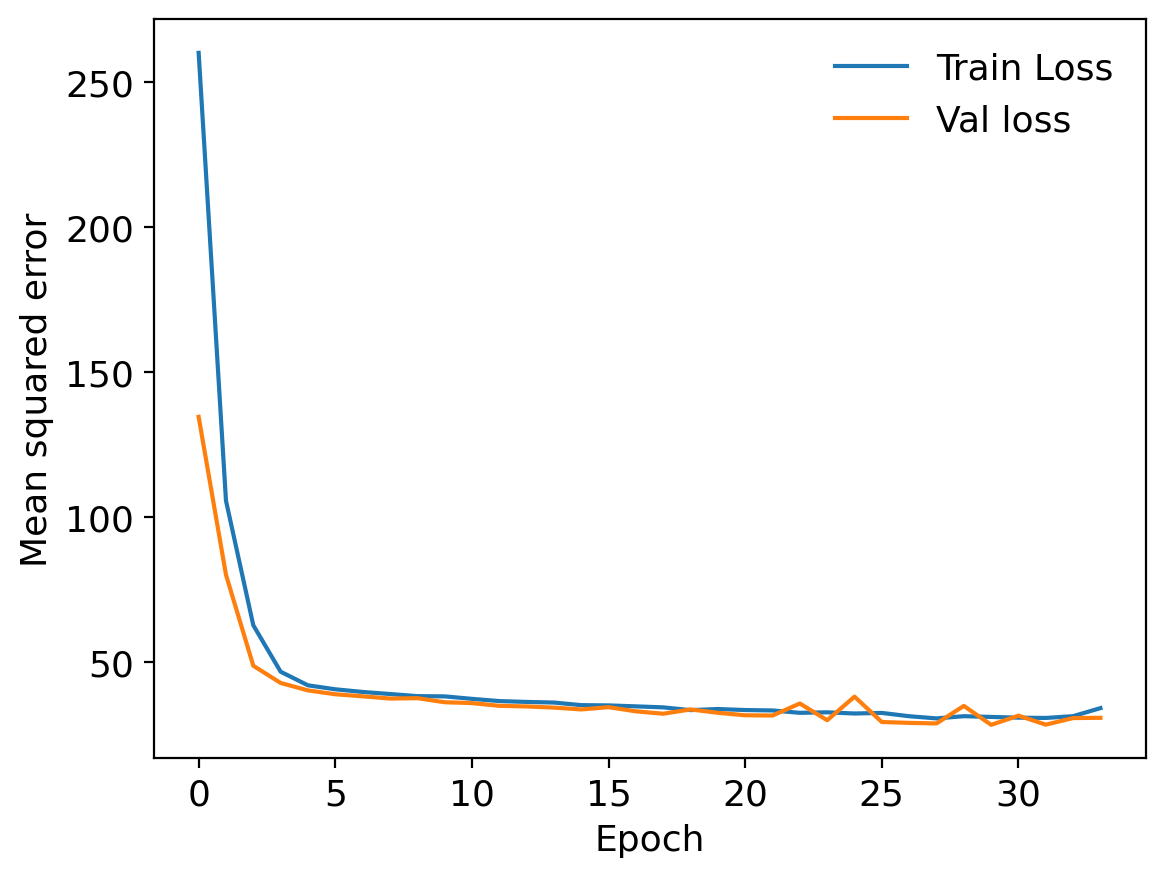

In [27]:
plot_history(history)

In [30]:
y_test_pre_1 = model.predict(x_test_np)
y_test_pre_1 = y_test_pre_1.reshape(y_test_pre_1.shape[0], 180, 360)
y_test_pre_1 = xr.Dataset(coords={'time': y_test.time.values, 
                               'latitude': y_test.lat.values, 
                               'longitude': y_test.lon.values},
                       data_vars=dict(pre=(['time', 'latitude', 'longitude'], y_test_pre_1)))

4/4 [==============================] - 15s 3s/step


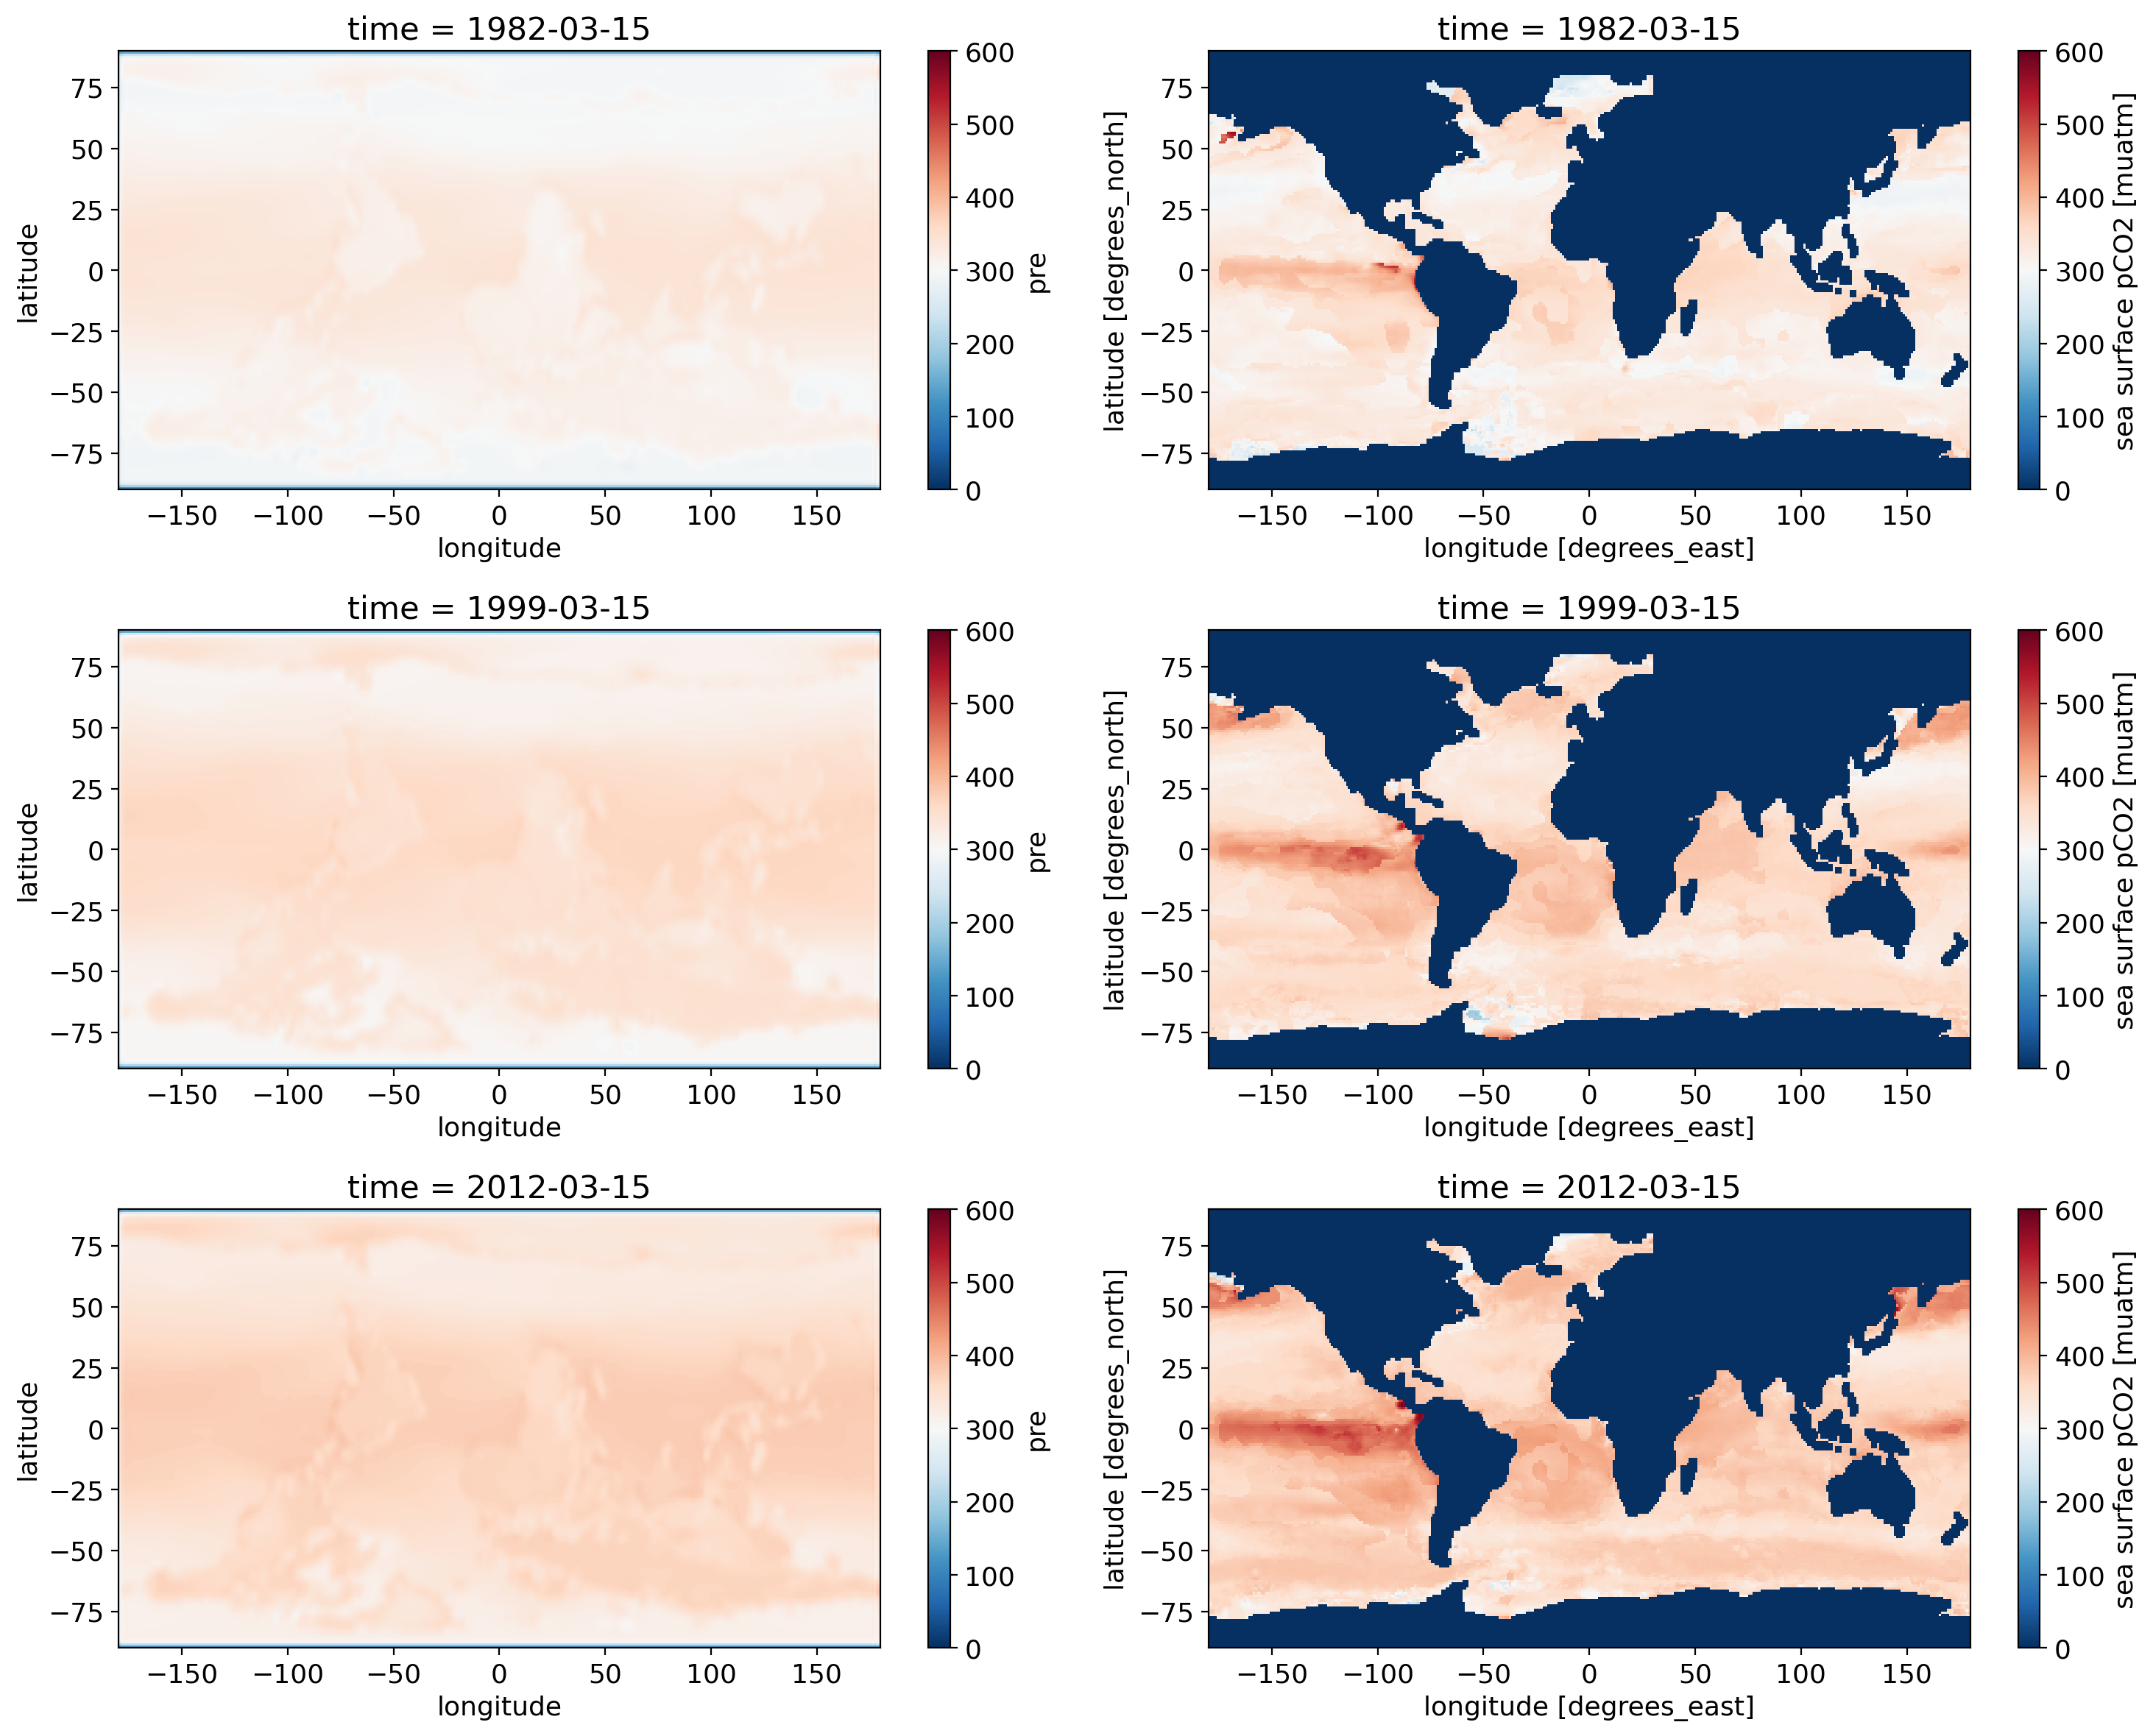

In [31]:
fig, axes = plt.subplots(figsize=(15,12),ncols=2,nrows=3)

t = [1, 50, 90]
vmin, vmax    = 0, 600
cmap = 'RdBu_r'
y_test_pre_1.pre[t[0]].plot(ax=axes[0,0], 
                                   vmin=vmin, vmax=vmax,
                                   cmap=cmap)
y_test.spco2_raw[t[0]].plot(ax=axes[0,1], 
                                  vmin=vmin, vmax=vmax,
                                 cmap=cmap)

y_test_pre_1.pre[t[1]].plot(ax=axes[1,0], 
                                   vmin=vmin, vmax=vmax,
                                   cmap=cmap)
y_test.spco2_raw[t[1]].plot(ax=axes[1,1], 
                                  vmin=vmin, vmax=vmax,
                                  cmap=cmap)

y_test_pre_1.pre[t[2]].plot(ax=axes[2,0], 
                                   vmin=vmin, vmax=vmax,
                                   cmap=cmap)
y_test.spco2_raw[t[2]].plot(ax=axes[2,1], 
                                  vmin=vmin, vmax=vmax,
                                 cmap=cmap)



plt.tight_layout()

In [1]:
res = y_test.spco2_raw[t[1]] - y_test_pre_1.pre[t[1]]
res.plot()

NameError: name 'y_test' is not defined

### Other nets

In [25]:
conv_net_4 = Sequential([
    Conv2D(nf, kernel_size=3, strides=1, activation='relu', padding='same', input_shape=(720, 1440, 3)),
    Conv2D(nf, kernel_size=3, strides=2, activation='relu', padding='same'),
    Conv2D(nf, kernel_size=3, strides=1, activation='relu', padding='same'),
    Conv2D(nf, kernel_size=3, strides=2, activation='relu', padding='same'),
    Conv2D(10, kernel_size=3, strides=1, activation='relu',padding='same'),
    Conv2D(1, kernel_size=3, strides=1, activation='relu',padding='same'),
#    GlobalAveragePooling2D(),
#    Activation('softmax')
])

conv_net_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 720, 1440, 32)     896       
                                                                 
 conv2d_7 (Conv2D)           (None, 360, 720, 32)      9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 360, 720, 32)      9248      
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 360, 32)      9248      
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 360, 10)      2890      
                                                                 
 conv2d_11 (Conv2D)          (None, 180, 360, 1)       91        
                                                                 
Total params: 31,621
Trainable params: 31,621
Non-trai

In [26]:
#Sixth Try. 
#Decreased learning rate by another 50% to 0.25*(1e-2)
#Decreased minibatch_size by 50% to 18
#Number of epochs remains the same, network structure remains the same
#Increased early stoping constrains

conv_net_4.compile(loss = custom_rmse,
                   metrics = ['acc', 'mse', 'mae', 'mape'],
                   optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate))

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta=0, patience=4, verbose=1, mode='min')


history = conv_net_4.fit(x_train_np, y_train_np, 
                         batch_size          = minibatch_size, 
                         epochs              = num_epochs , 
                         validation_data     = (x_test_np, y_test_np),
                        callbacks            = [early_stop] 
                        )

Epoch 1/50
10/10 [==============================] - 401s 40s/step - loss: 308.4864 - acc: 0.0796 - mse: 54066.2109 - mae: 179.4148 - mape: 21408518144.0000 - val_loss: 265.8741 - val_acc: 0.0000e+00 - val_mse: 229933.5781 - val_mae: 429.7078 - val_mape: 295251542016.0000
Epoch 2/50
10/10 [==============================] - 380s 38s/step - loss: 85.3755 - acc: 0.0000e+00 - mse: 65300.6289 - mae: 199.3507 - mape: 164509712384.0000 - val_loss: 225.0557 - val_acc: 0.0000e+00 - val_mse: 189193.1562 - val_mae: 382.7257 - val_mape: 270123532288.0000
Epoch 3/50
10/10 [==============================] - 410s 40s/step - loss: 51.0838 - acc: 0.0000e+00 - mse: 51010.2266 - mae: 172.2173 - mape: 152118231040.0000 - val_loss: 95.3911 - val_acc: 0.0000e+00 - val_mse: 94979.8906 - val_mae: 248.2523 - val_mape: 203715756032.0000
Epoch 4/50
10/10 [==============================] - 404s 40s/step - loss: 43.9244 - acc: 0.0000e+00 - mse: 50354.4766 - mae: 169.3108 - mape: 152137744384.0000 - val_loss: 78.064

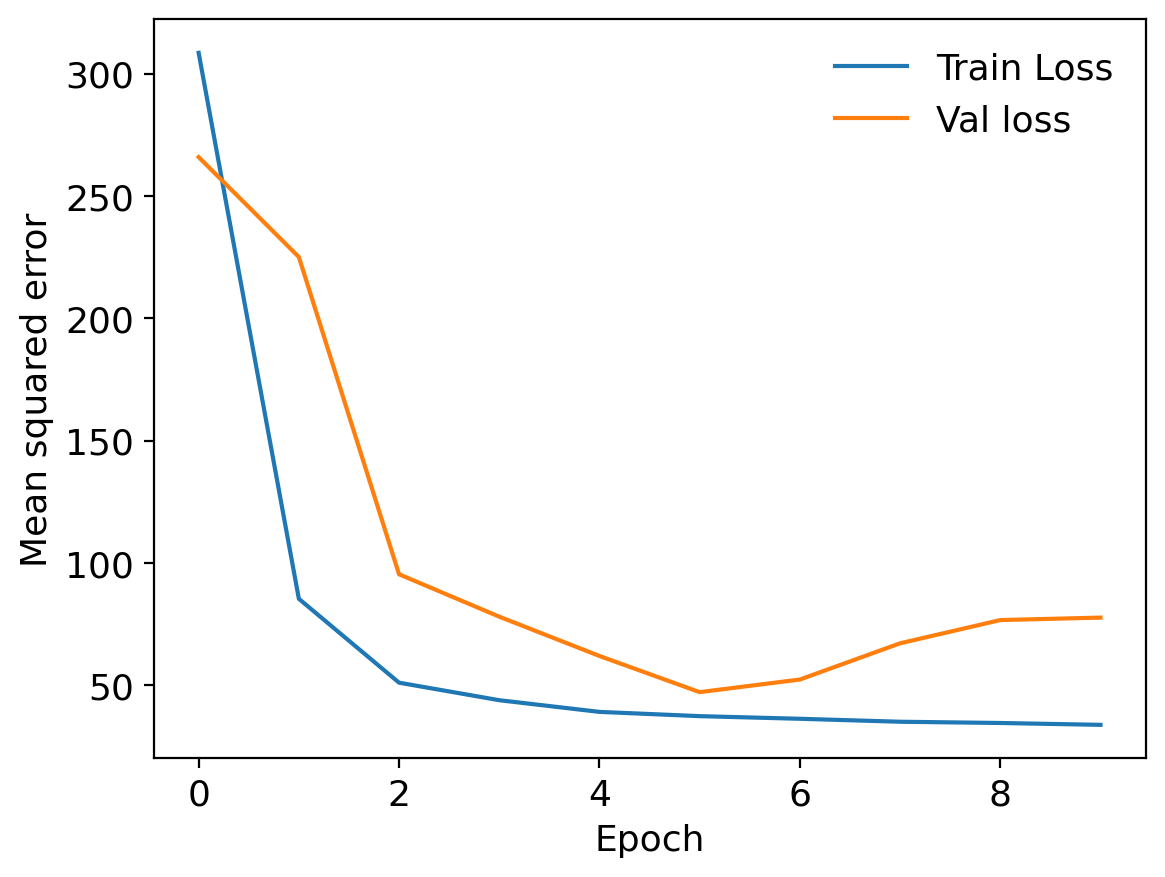

In [27]:
plot_history(history)

In [28]:
y_test_pre3 = conv_net_4.predict(x_test_np)
y_test_pre3 = y_test_pre3.reshape(y_test_pre3.shape[0], 180, 360)
y_test_pre3 = xr.Dataset(coords={'time': y_test.time.values, 
                               'latitude': y_test.lat.values, 
                               'longitude': y_test.lon.values},
                       data_vars=dict(tas=(['time', 'latitude', 'longitude'], y_test_pre3)))

5/5 [==============================] - 26s 5s/step


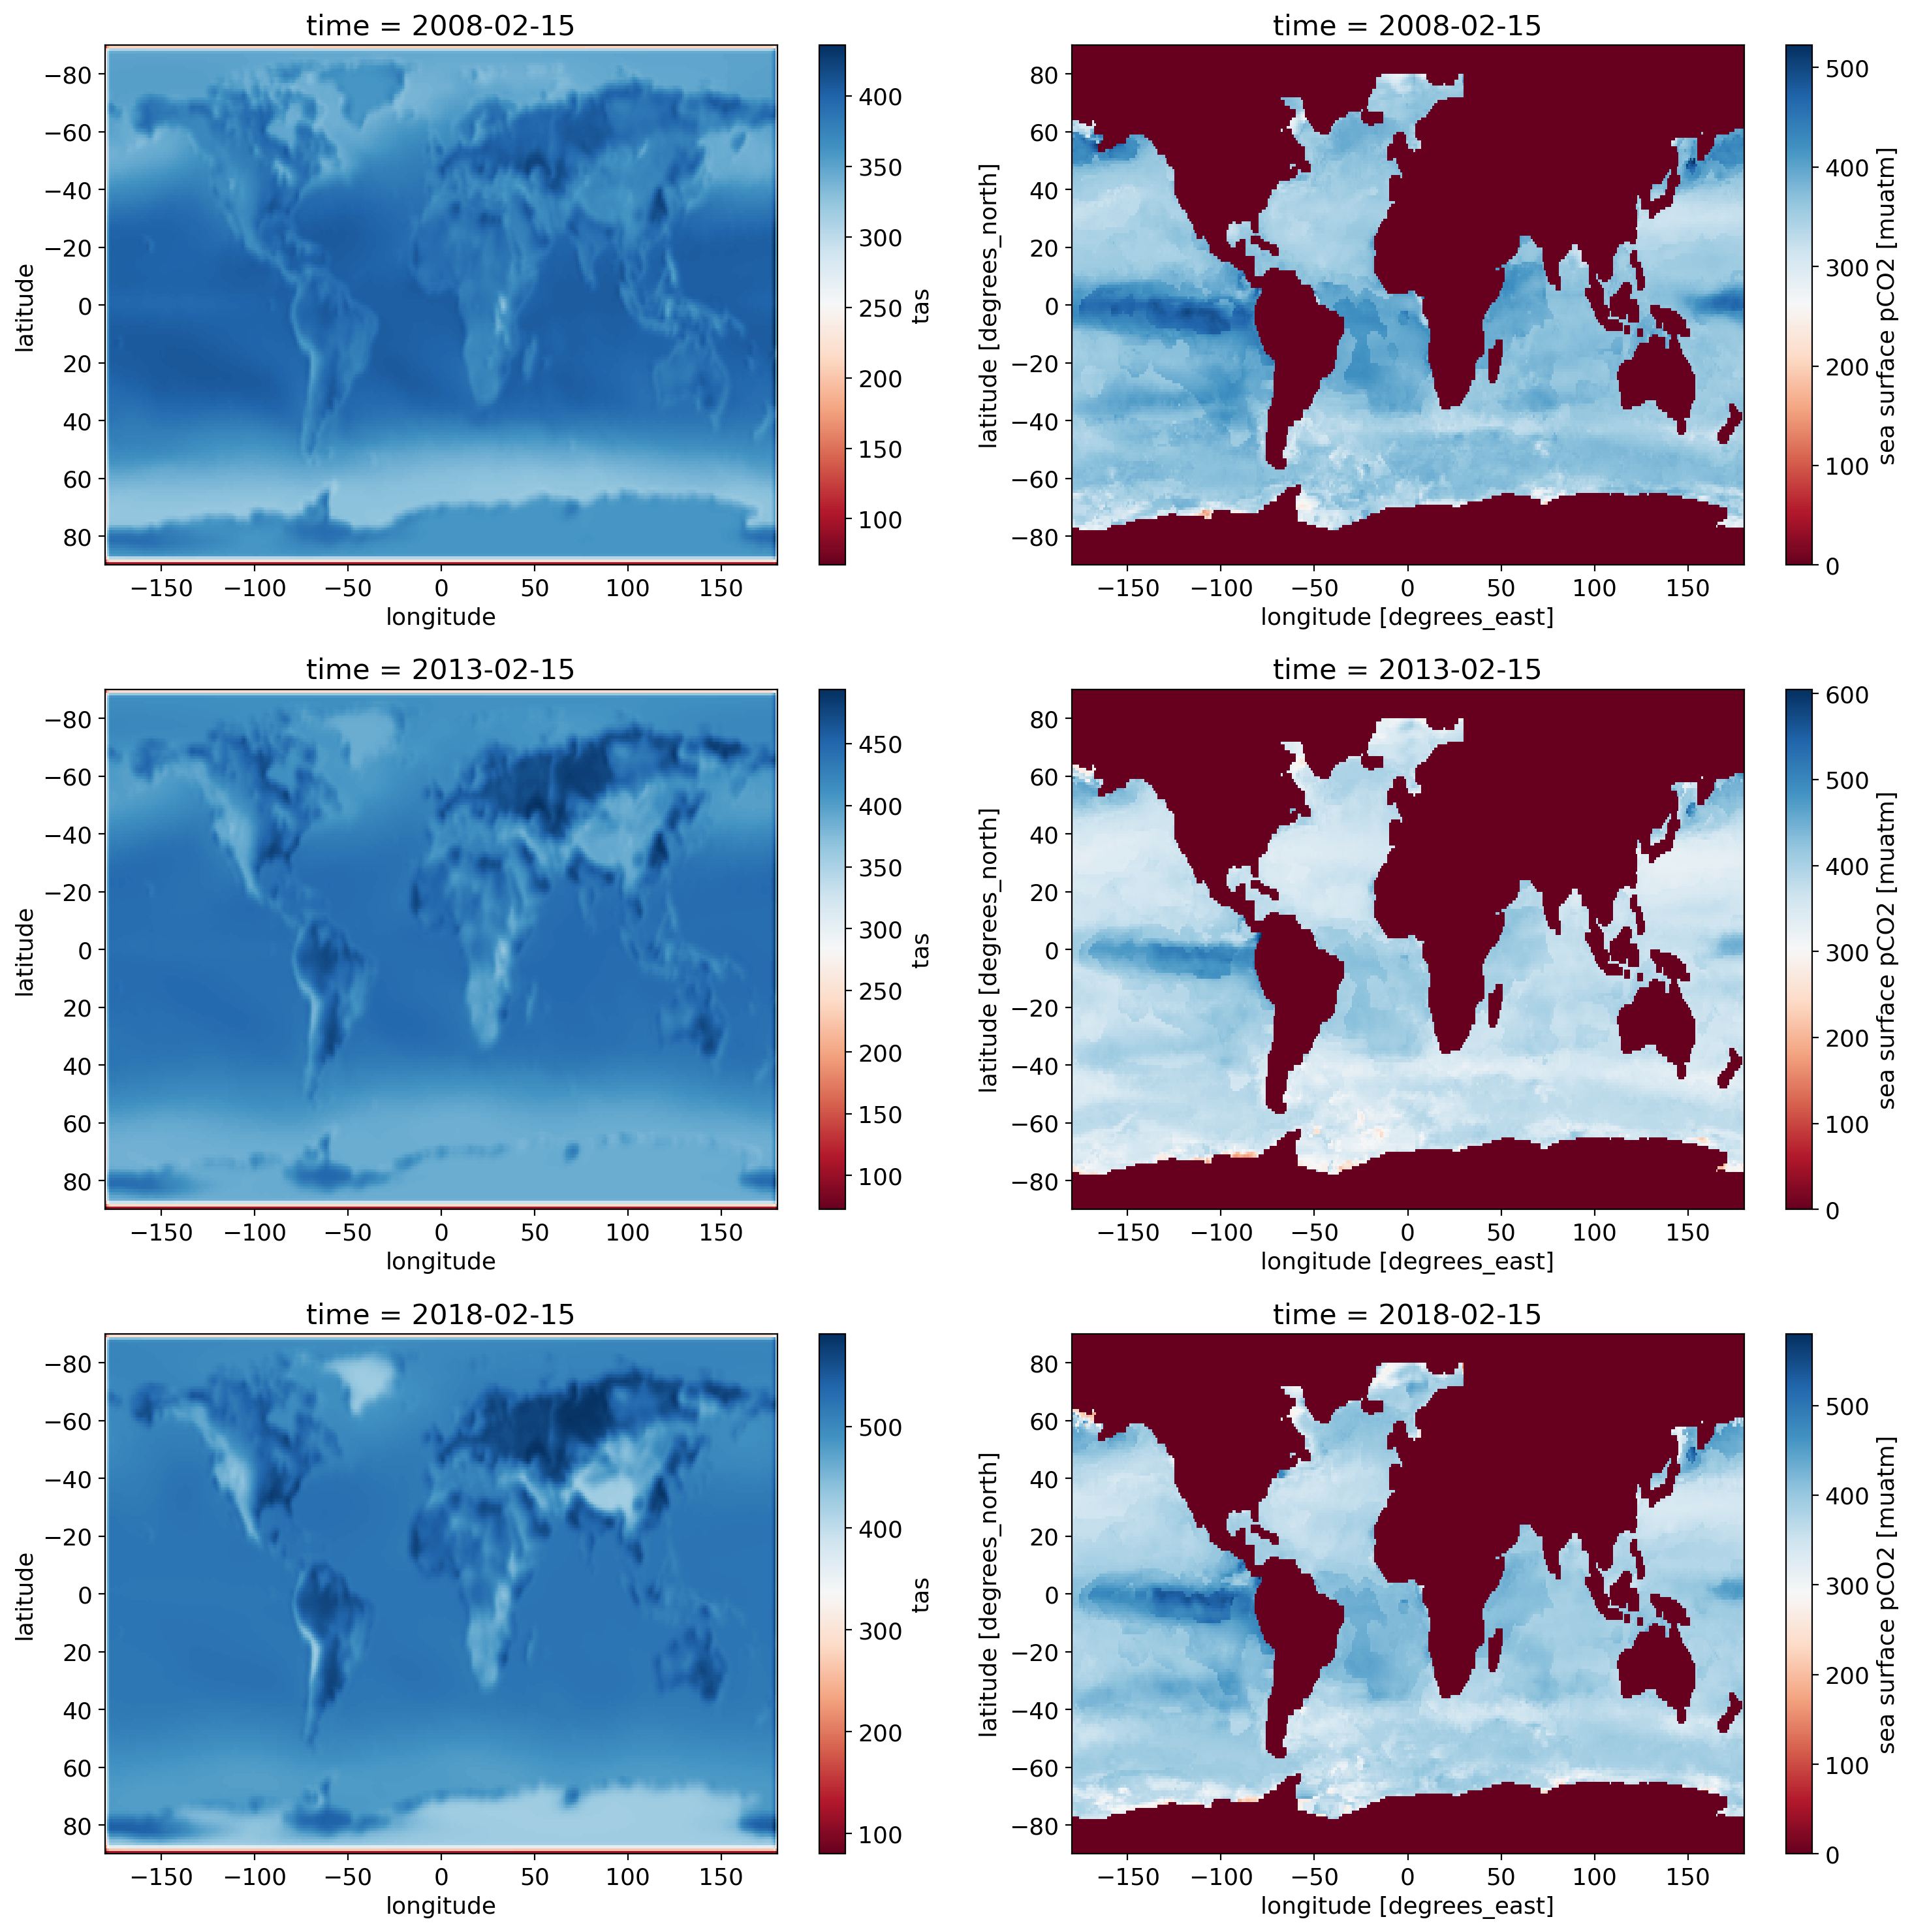

In [29]:
fig, axes = plt.subplots(figsize=(15,15),ncols=2
                         ,nrows=3
                        )

times = ['2008-02-15', '2013-02-15', '2018-02-15']
#vmin, vmax    = -6, 6
cmap = 'RdBu'
y_test_pre3.tas.sel(time=times[0]).plot(ax=axes[0,0], 
                                     #vmin=vmin, vmax=vmax,
                                     cmap=cmap
                                    )
axes[0,0].invert_yaxis()
y_test.spco2_raw.sel(time=times[0]).plot(ax=axes[0,1], 
                                 #vmin=vmin, vmax=vmax,
                                 cmap=cmap
                                )

y_test_pre3.tas.sel(time=times[1]).plot(ax=axes[1,0], 
                                     #vmin=vmin, vmax=vmax,
                                     cmap=cmap
                                    )
axes[1,0].invert_yaxis()
y_test.spco2_raw.sel(time=times[1]).plot(ax=axes[1,1], 
                                 #vmin=vmin, vmax=vmax,
                                 cmap=cmap
                                )



y_test_pre3.tas.sel(time=times[2]).plot(ax=axes[2,0], 
                                     #vmin=vmin, vmax=vmax,
                                     cmap=cmap
                                    )
axes[2,0].invert_yaxis()
y_test.spco2_raw.sel(time=times[2]).plot(ax=axes[2,1], 
                                 #vmin=vmin, vmax=vmax,
                                 cmap=cmap
                                )

plt.tight_layout()




In [34]:
from sklearn.metrics import r2_score

r = r2_score(y_test.spco2_raw.sel(time=times[1]), y_test_pre3.tas.sel(time=times[1]))
r

-1.675608700209872

In [92]:
def my_loss(y_true, y_pred):
    return K.mean(tf.math.squared_difference(y_pred, K.cast(y_true>0, "float32")),axis= -1)

In [103]:
conv_net_5 = Sequential([
    Conv2D(nf, kernel_size=ks, strides=1, activation='relu', padding='same', input_shape=(360, 720, 3)),
    Conv2D(nf, kernel_size=ks, strides=1, activation='relu', padding='same'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(nf, kernel_size=ks, strides=1, activation='relu', padding='same'),
    Conv2D(nf, kernel_size=ks, strides=1, activation='relu', padding='same'),
    Conv2D(10, kernel_size=ks, strides=1, activation='relu',padding='same'),
    Conv2D(1, kernel_size=ks, strides=1, activation='relu',padding='same'),
])

conv_net_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 360, 720, 32)      416       
                                                                 
 conv2d_25 (Conv2D)          (None, 360, 720, 32)      4128      
                                                                 
 average_pooling2d (AverageP  (None, 180, 360, 32)     0         
 ooling2D)                                                       
                                                                 
 conv2d_26 (Conv2D)          (None, 180, 360, 32)      4128      
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 360, 32)      4128      
                                                                 
 conv2d_28 (Conv2D)          (None, 180, 360, 10)      1290      
                                                      

In [110]:
#Seventh Try. 
#Downsampled input data
#Number of epochs remains the same, network structure remains the same

conv_net_5.compile(loss = my_loss,
                   optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate))

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta=0, patience=4, verbose=1, mode='min')

history = conv_net_5.fit(x_train_np, y_train_np, 
                         batch_size          = minibatch_size, 
                         epochs              = num_epochs , 
                         validation_data     = (x_test_np, y_test_np),
                        callbacks            = [early_stop] 
                        )

Epoch 1/100
11/11 [==============================] - 81s 7s/step - loss: 0.4977 - val_loss: 0.4607
Epoch 2/100
11/11 [==============================] - 74s 7s/step - loss: 0.4346 - val_loss: 0.3909
Epoch 3/100
11/11 [==============================] - 74s 7s/step - loss: 0.3629 - val_loss: 0.3157
Epoch 4/100
11/11 [==============================] - 73s 7s/step - loss: 0.2941 - val_loss: 0.2712
Epoch 5/100
11/11 [==============================] - 75s 7s/step - loss: 0.2617 - val_loss: 0.2491
Epoch 6/100
11/11 [==============================] - 75s 7s/step - loss: 0.2420 - val_loss: 0.2340
Epoch 7/100
11/11 [==============================] - 73s 7s/step - loss: 0.2301 - val_loss: 0.2269
Epoch 8/100
11/11 [==============================] - 73s 7s/step - loss: 0.2244 - val_loss: 0.2226
Epoch 9/100
11/11 [==============================] - 72s 7s/step - loss: 0.2214 - val_loss: 0.2203
Epoch 10/100
11/11 [==============================] - 73s 7s/step - loss: 0.2197 - val_loss: 0.2189
Epoch 11/

Epoch 83/100
11/11 [==============================] - 75s 7s/step - loss: 0.1765 - val_loss: 0.1768
Epoch 84/100
11/11 [==============================] - 75s 7s/step - loss: 0.1769 - val_loss: 0.1776
Epoch 85/100
11/11 [==============================] - 74s 7s/step - loss: 0.1765 - val_loss: 0.1765
Epoch 86/100
11/11 [==============================] - 74s 7s/step - loss: 0.1760 - val_loss: 0.1764
Epoch 87/100
11/11 [==============================] - 72s 6s/step - loss: 0.1758 - val_loss: 0.1760
Epoch 88/100
11/11 [==============================] - 72s 7s/step - loss: 0.1757 - val_loss: 0.1764
Epoch 89/100
11/11 [==============================] - 73s 7s/step - loss: 0.1759 - val_loss: 0.1774
Epoch 90/100
11/11 [==============================] - 71s 6s/step - loss: 0.1766 - val_loss: 0.1757
Epoch 91/100
11/11 [==============================] - 72s 7s/step - loss: 0.1754 - val_loss: 0.1755
Epoch 92/100
11/11 [==============================] - 71s 6s/step - loss: 0.1750 - val_loss: 0.1754


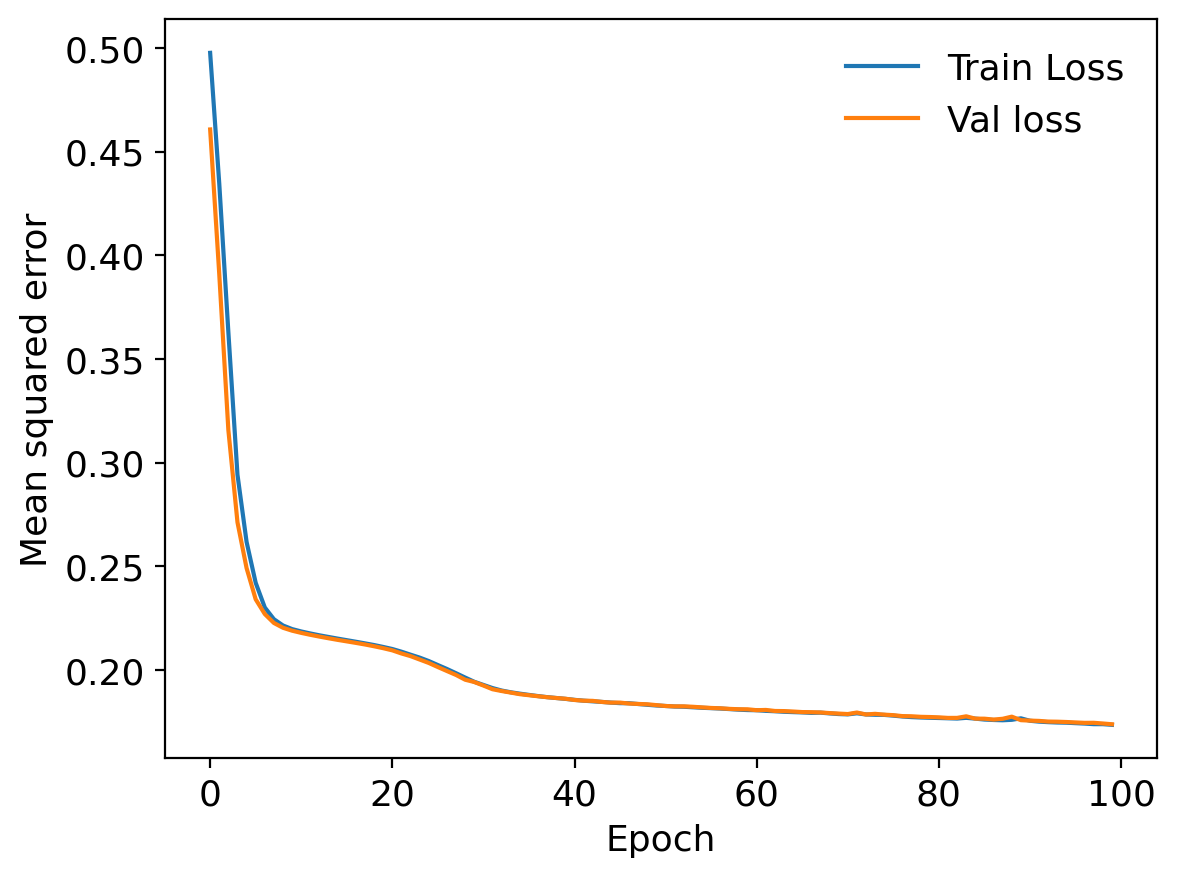

In [111]:
plot_history(history)

In [113]:
y_test_pre5 = conv_net_5.predict(x_test_np)
y_test_pre5 = y_test_pre5.reshape(y_test_pre5.shape[0], 180, 360)
y_test_pre5 = xr.Dataset(coords={'time': y_test.time.values, 
                               'latitude': y_test.lat.values, 
                               'longitude': y_test.lon.values},
                       data_vars=dict(tas=(['time', 'latitude', 'longitude'], y_test_pre5)))

4/4 [==============================] - 6s 1s/step


In [114]:
y_test_pre4

<xarray.Dataset>
Dimensions:    (time: 114, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 1982-04-15 1983-02-15 ... 2019-09-15
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    tas        (time, latitude, longitude) float32 0.01807 0.01807 ... 0.0 0.0

In [115]:
y_test_pre5

<xarray.Dataset>
Dimensions:    (time: 114, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 1982-08-15 1982-09-15 ... 2019-12-15
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    tas        (time, latitude, longitude) float32 0.16 0.1603 ... 0.1638 0.1377

In [45]:
y_test_pre4.tas[1].data

array([[325.89413   , 325.9441    , 325.9942    , ..., 231.02017   ,
        109.31637   ,  21.983099  ],
       [325.67566   , 325.74518   , 325.82144   , ..., 230.83696   ,
        109.229004  ,  21.964903  ],
       [325.47122   , 325.55664   , 325.65036   , ..., 230.65083   ,
        109.144104  ,  21.948292  ],
       ...,
       [154.92943   , 154.91032   , 154.89001   , ...,  90.08265   ,
         33.36981   ,   4.0516095 ],
       [ 44.07402   ,  44.067276  ,  44.06016   , ...,  16.822008  ,
          1.1944166 ,   0.        ],
       [  0.81395036,   0.81376916,   0.8135746 , ...,   0.        ,
          0.        ,   0.        ]], dtype=float32)

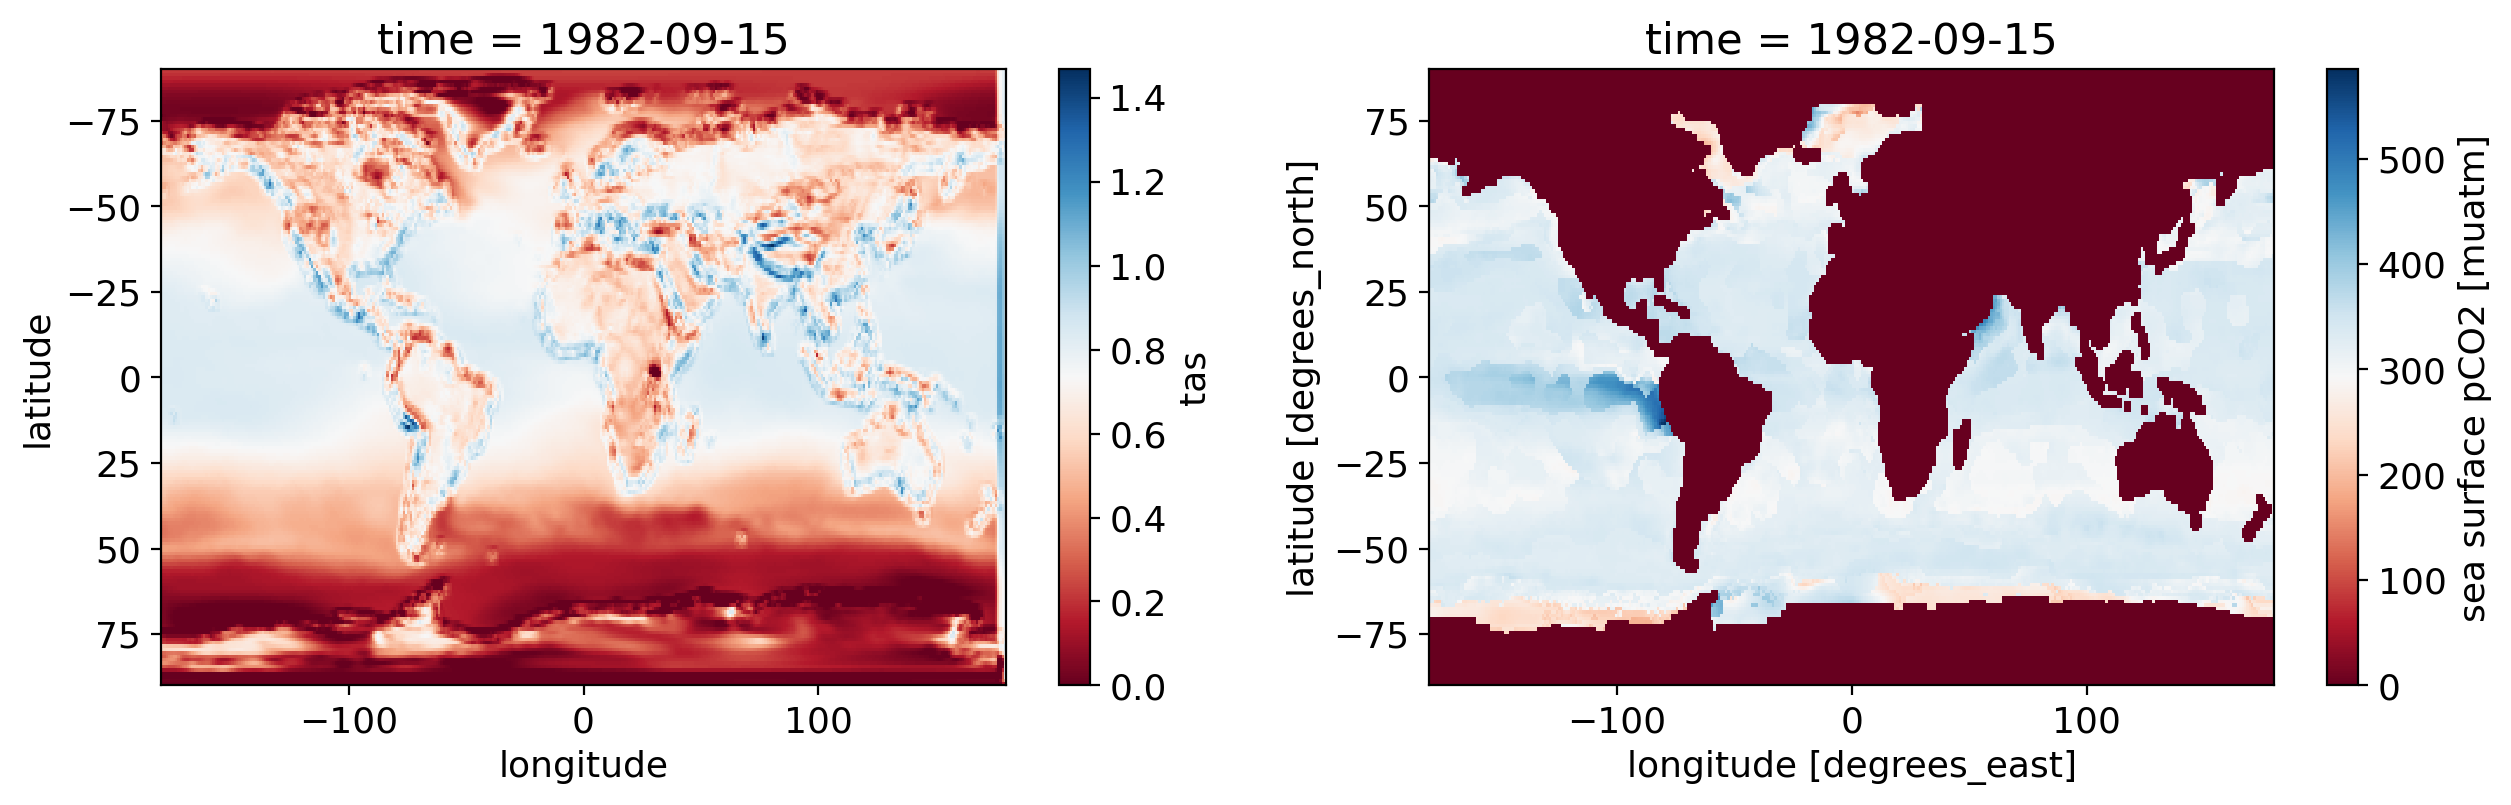

In [117]:
fig, axes = plt.subplots(figsize=(15,4),ncols=2
#                         ,nrows=3
                        )


cmap = 'RdBu'
y_test_pre5.tas[1].plot(ax=axes[0], 
                                     cmap=cmap
                                    )
axes[0].invert_yaxis()
y_test.spco2_raw.sel(time= '1982-09-15').plot(ax=axes[1], 
                                 #vmin=vmin, vmax=vmax,
                                 cmap=cmap
                                )

In [118]:
from sklearn.metrics import r2_score

r = r2_score(y_test.spco2_raw.sel(time='1982-09-15'), y_test_pre5.tas[1])
r

-1.2736259641278558

In [119]:
los = y_test.spco2_raw.sel(time='1982-09-15') - y_test_pre5.tas[1]
los

<xarray.DataArray (lat: 180, lon: 360, latitude: 180, longitude: 360)>
array([[[[-0.2159461 , -0.2159572 , -0.21607406, ..., -0.7449721 ,
          -0.7952294 , -0.80740124],
         [-0.20050924, -0.20016024, -0.19973657, ..., -0.7425561 ,
          -0.796001  , -0.81001467],
         [-0.17647748, -0.17569228, -0.1749096 , ..., -0.7373732 ,
          -0.7959718 , -0.81295747],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          -0.28038102, -0.75613636],
         [-0.01208081, -0.01197695, -0.01184857, ..., -0.05714387,
          -0.30039883, -0.51190114],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          -0.13448456, -0.14593162]],

        [[-0.2159461 , -0.2159572 , -0.21607406, ..., -0.7449721 ,
          -0.7952294 , -0.80740124],
         [-0.20050924, -0.20016024, -0.19973657, ..., -0.7425561 ,
          -0.796001  , -0.81001467],
         [-0.17647748, -0.17569228, -0.1749096 , ..., -0.7373732 ,
          -0.7959718 , -0.81295747],
...
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          -0.28038102, -0.75613636],
         [-0.01208081, -0.01197695, -0.01184857, ..., -0.05714387,
          -0.30039883, -0.51190114],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          -0.13448456, -0.14593162]],

        [[-0.2159461 , -0.2159572 , -0.21607406, ..., -0.7449721 ,
          -0.7952294 , -0.80740124],
         [-0.20050924, -0.20016024, -0.19973657, ..., -0.7425561 ,
          -0.796001  , -0.81001467],
         [-0.17647748, -0.17569228, -0.1749096 , ..., -0.7373732 ,
          -0.7959718 , -0.81295747],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          -0.28038102, -0.75613636],
         [-0.01208081, -0.01197695, -0.01184857, ..., -0.05714387,
          -0.30039883, -0.51190114],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          -0.13448456, -0.14593162]]]], dtype=float32)
Coordinates:
    time       datetime64[ns] 1982-09-15
  * lat        (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5